# 1 stair

pas de marche

In [1]:
# Time limit
T = 20

# Stations number
D = 10

# Requests number
R = 10

# Create random requests

In [66]:
from random import seed
from random import randint

# seed random number generator
#seed(1)

requests_list = []

for i in range(R):
    t1 = randint(0,T-1)
    t2 = randint(t1+1,T)
    d1 = randint(0,D-1)
    d2 = randint(d1+1,D)
    r = (d1,d2,t1,t2)
    requests_list.append(r)
print(requests_list)

[(8, 10, 0, 18), (0, 4, 14, 19), (9, 10, 5, 14), (4, 5, 2, 20), (0, 8, 2, 5), (3, 6, 0, 9), (5, 8, 3, 9), (2, 7, 2, 8), (4, 10, 16, 18), (5, 9, 9, 17)]


# Plot the rectangles

(év. les arrondir pour + de visibilité)

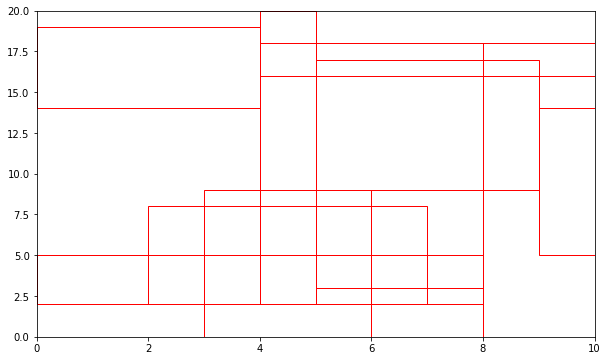

In [67]:
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Create the window itself

fig, ax = plt.subplots(figsize=(10, 6))

xlim(0,10)
ylim(0,20)

# Create the rectangles "patchs"
for i in range(R):
    a = requests_list[i]
    rect = patches.Rectangle((a[0],a[2]),a[1]-a[0],a[3]-a[2], linewidth=1, edgecolor='r', facecolor='none')

# Add the rectangle to the Axes
    ax.add_patch(rect)

plt.show()

# Select the best horizontal line

passera obligatoirement par le top ou le bot d'un rectangle (2 n possibilités)

On ne s'intéresse pas aux lieux de départs/arrivées (longueur des rectangles)

In [68]:
requests_list[i][2]
requests_list[i][3]

17

In [69]:
possible_list = []
for r in requests_list:
    possible_list.append(r[2])
    possible_list.append(r[3])
possible_list = list(set(possible_list))
possible_list.sort(reverse=True)

In [70]:
possible_list

[20, 19, 18, 17, 16, 14, 9, 8, 5, 3, 2, 0]

In [71]:
n = []
a = 0
for i in possible_list:
    for r in requests_list:
        if i >= r[2] and i <= r[3]:
            a = a + 1
    n.append((i,a))
    a = 0
print(n)  

[(20, 1), (19, 2), (18, 4), (17, 5), (16, 5), (14, 5), (9, 6), (8, 6), (5, 7), (3, 6), (2, 5), (0, 2)]


In [72]:
def second(a):
    return(a[1])

In [73]:
n.sort(key=second, reverse = True)

In [74]:
n[0][0]

5

# Rectangle avec line opti

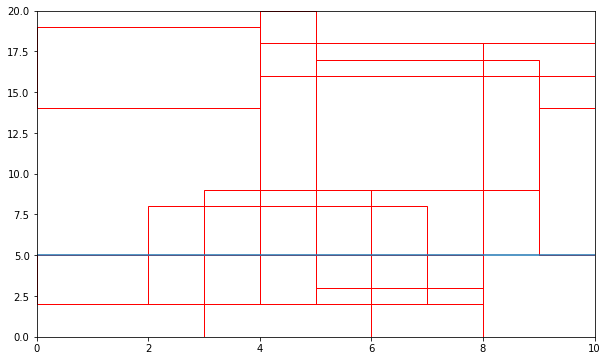

In [75]:
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Create the window itself

fig, ax = plt.subplots(figsize=(10, 6))

xlim(0,10)
ylim(0,20)

# Create the rectangles "patchs"
for i in range(R):
    a = requests_list[i]
    rect = patches.Rectangle((a[0],a[2]),a[1]-a[0],a[3]-a[2], linewidth=1, edgecolor='r', facecolor='none')

# Add the rectangle to the Axes
    ax.add_patch(rect)
    
plt.axhline(y=n[0][0])

plt.show()

# Suite

On a déjà le nombre de rectangles traversés par chaque ligne horizontale top/bot
Chaque marche passera par une de ces lignes

Comment concilier les 2/3/4 de manières efficaces ???